In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/dataset/Parking.v1i.tensorflow.zip > /dev/null

In [3]:
import cv2
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
req_images = pd.read_csv('train/_annotations.csv')
req_images.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,197,304,252,378
1,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,176,254,226,312
2,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,159,212,203,264
3,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,145,175,186,223
4,2013-03-17_17_15_13_jpg.rf.63df560223c410618de...,416,416,space-empty,133,146,170,183


In [5]:
classes = req_images['class'].tolist()

class1 = []
i = 0
while i < len(classes):
  class1.append(classes[i])
  i+=40

class1[:5]

['space-empty',
 'space-occupied',
 'space-occupied',
 'space-occupied',
 'space-occupied']

In [6]:
train_label = []
space_empty = 0
space_occupied = 1

for i in class1:
  train_label.append(space_empty) if i == 'space-empty' else train_label.append(space_occupied)

train_label = np.array(train_label, dtype='float32')
train_label[:10]

array([0., 1., 1., 1., 1., 1., 1., 0., 1., 1.], dtype=float32)

In [7]:
list_filename = []
for filename in req_images['filename']:
  if 'train/'+filename not in list_filename:
    list_filename.append('train/'+filename)

print("filename not duplicated: {}".format(len(list_filename)))
list_filename[:5]

filename not duplicated: 2866


['train/2013-03-17_17_15_13_jpg.rf.63df560223c410618de6b0580e15b7af.jpg',
 'train/2013-03-14_07_20_01_jpg.rf.63e1888020c2c91aed26867135f16010.jpg',
 'train/2013-03-19_09_40_04_jpg.rf.647991c051ccf1114b68d53277e89840.jpg',
 'train/2013-03-14_14_36_02_jpg.rf.64417b42b58835958e3f70a1563c61f4.jpg',
 'train/2013-04-14_15_20_10_jpg.rf.63ef331a6e5fd06436272b8d6e64e449.jpg']

In [8]:
def generate_images(list_filename):
    
    images = []
   
    for index, element in enumerate(list_filename):
      path = element
      input_image = cv2.imread(path)
      input_image = cv2.resize(input_image, (96,96))
      images.append(input_image)
    
    images = np.array(images)
    print('images_shape:',images.shape)
    source_images = list_filename
    return images, source_images

model_input_images, source_images = generate_images(list_filename)
len(model_input_images)

images_shape: (2866, 96, 96, 3)


2866

In [9]:
req_images['width_ratio'] = req_images['width']/96
req_images['height_ratio'] = req_images['height']/96
req_images['xmin'] = req_images['xmin']/req_images['width_ratio']
req_images['xmax'] = req_images['xmax']/req_images['width_ratio']
req_images['ymin'] = req_images['ymin']/req_images['height_ratio']
req_images['ymax'] = req_images['ymax']/req_images['height_ratio']

In [10]:
def generate_keypoints():

  req_image = req_images.reset_index()
  keypoint_features = []
  for index, image in enumerate(source_images):
    try:
      image_name = image
      #print(image_name)
      mask = req_image.iloc[[index]]
      mask = mask.values.tolist()
      #print(index)
      #print(mask)
      keypoints = (mask[0][5:9])
      #print(keypoints)
      newList = [int(x) / 96 for x in keypoints]
      #print(newList)
      keypoint_features.append(newList)
    except:
      print('error !')
      break
  keypoint_features = np.array(keypoint_features, dtype='float32')
  return keypoint_features

In [11]:
model_input_keypoints = generate_keypoints()

In [12]:
print(len(model_input_keypoints))
print(model_input_keypoints[:40])

2866
[[0.46875    0.7291667  0.6041667  0.90625   ]
 [0.41666666 0.6041667  0.5416667  0.75      ]
 [0.375      0.5        0.47916666 0.625     ]
 [0.34375    0.41666666 0.4375     0.53125   ]
 [0.3125     0.34375    0.40625    0.4375    ]
 [0.29166666 0.27083334 0.38541666 0.36458334]
 [0.26041666 0.21875    0.34375    0.29166666]
 [0.23958333 0.15625    0.3125     0.22916667]
 [0.22916667 0.11458334 0.30208334 0.17708333]
 [0.21875    0.0625     0.28125    0.125     ]
 [0.5625     0.65625    0.6666667  0.7916667 ]
 [0.48958334 0.5520833  0.6041667  0.6666667 ]
 [0.46875    0.44791666 0.5625     0.5520833 ]
 [0.41666666 0.36458334 0.5208333  0.45833334]
 [0.39583334 0.29166666 0.48958334 0.375     ]
 [0.36458334 0.22916667 0.45833334 0.3125    ]
 [0.34375    0.17708333 0.41666666 0.25      ]
 [0.3125     0.11458334 0.39583334 0.19791667]
 [0.29166666 0.08333334 0.36458334 0.14583333]
 [0.27083334 0.04166667 0.34375    0.10416666]
 [0.84375    0.46875    0.9166667  0.5833333 ]
 [0.7812

In [13]:
!mkdir images plt_images

In [21]:
from PIL import Image

In [22]:
for index, image in enumerate(model_input_images):  
  hm = Image.fromarray(image)
  hm.save("images/{}.jpg".format(index))

In [14]:
spaces1 = model_input_keypoints[0]*96
spaces1

array([45., 70., 58., 87.], dtype=float32)

In [15]:
startX, endX = int(spaces1[0]), int(spaces1[1])
startY, endY = int(spaces1[2]), int(spaces1[3])

In [57]:
for index in range(len(model_input_images)):
  if train_label[index] == 0: #if empty
    image = cv2.imread('images/{}.jpg'.format(index))
    out = cv2.rectangle(image, (startX, endX), (startY, endY), (255,0,0), 1)
    plt.imsave('plt_images/empty/empty_{}.jpg'.format(index), image)
  else:
    image = cv2.imread('images/{}.jpg'.format(index))
    out = cv2.rectangle(image, (startX, endX), (startY, endY), (255,0,0), 1)
    plt.imsave('plt_images/occupied/occupied_{}.jpg'.format(index), image)

In [58]:
print(len(os.listdir('plt_images/empty')))
print(len(os.listdir('plt_images/occupied')))

1066
1800


In [26]:
import tensorflow as tf
import pathlib

In [27]:
data_dir = pathlib.Path('plt_images')

In [28]:
batch_size = 32
img_height = 96
img_width = 96

In [29]:
!rmdir /content/plt_images/.ipynb_checkpoints

In [59]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 2866 files belonging to 2 classes.
Using 2293 files for training.
Found 2866 files belonging to 2 classes.
Using 573 files for validation.


In [31]:
class_names = train_ds.class_names
print(class_names)

['empty', 'occupied']


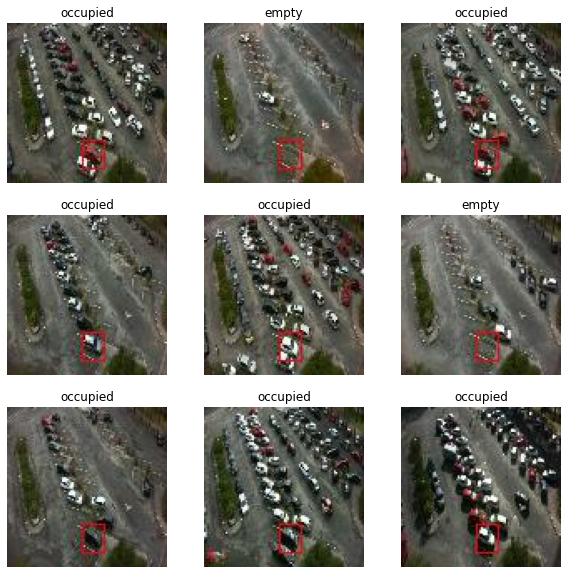

In [60]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [66]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 96, 96, 3)
(32,)


In [67]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [68]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 1.0


In [70]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 96, 96, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)       

In [72]:
tf.keras.backend.clear_session()

In [73]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
72/72 [==============================] - 1s 14ms/step - loss: 0.2419 - accuracy: 0.8932 - val_loss: 0.1083 - val_accuracy: 0.9738
Epoch 2/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0570 - accuracy: 0.9856 - val_loss: 0.0468 - val_accuracy: 0.9878
Epoch 3/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0302 - val_accuracy: 0.9948
Epoch 4/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0170 - accuracy: 0.9930 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.0035 - val_accuracy: 0.9983
Epoch 6/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0068 - accuracy: 0.9974 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
72/72 [==============================] - 1s 8ms/step - loss: 0.0020 - accuracy: 0.9991 - val_loss: 4.1043e-04 - val_accuracy: 1.0000
Epoch 8/10
72/7

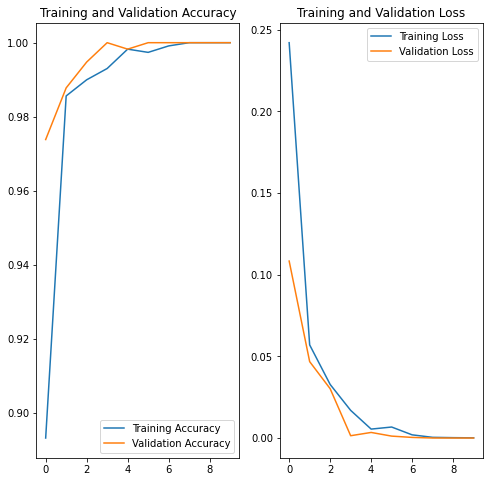

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [75]:
img_test_path = '/content/valid/2013-03-06_17_25_13_jpg.rf.a9dd23a9a7daab5c343d38d07fdfa592.jpg'
img = tf.keras.utils.load_img(
    img_test_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to occupied with a 100.00 percent confidence.


(-0.5, 95.5, 95.5, -0.5)

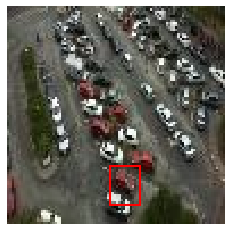

In [76]:
result_image = cv2.imread(img_test_path)
result_image = cv2.resize(result_image, (96,96))
out = cv2.rectangle(image, (startX, endX), (startY, endY), (255,0,0), 1)
out_img = plt.imshow(out, interpolation='nearest')
out_img.set_cmap('hot')
plt.axis('off')

In [ ]:
import time
saved_model_path = "./1_space_detection_{}.h5".format(int(time.time()))

model.save(saved_model_path)